In [1]:
import pandas as pd
import numpy as np
from sklearn import manifold
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

elec = electricity consumption per capita 
energy = energy consumption 
forest = % of forest cover
urban = % urban population
pop = % population growth
co2 = co2 emissions

In [2]:
elec = pd.read_csv('C:\Spring17\Viz\project\electric_power.csv')
elec = elec[np.isfinite(elec['2014'])]

In [3]:
co2 = pd.read_csv('C:\Spring17\Viz\project\co2_emissions.csv')
co2 = elec[np.isfinite(elec['2013'])]

In [4]:
forest = pd.read_csv('C:\Spring17\Viz\project\\forest.csv')
forest = forest[np.isfinite(forest['2014'])]

In [5]:
urban = pd.read_csv('C:\Spring17\Viz\project\urban_pop.csv')
urban = urban[np.isfinite(urban['2014'])]

In [6]:
pop = pd.read_csv('C:\Spring17\Viz\project\pop_growth.csv')
pop = pop[np.isfinite(pop['2014'])]

In [7]:
energy = pd.read_csv('C:\Spring17\Viz\project\energy_use.csv')
energy = energy[np.isfinite(energy['2014'])]

In [8]:
len(energy), len(pop), len(elec), len(urban), len(forest), len(co2)

(172, 262, 179, 260, 256, 179)

In [9]:
code_e = energy['Country Code'].values.tolist()
code_p = pop['Country Code'].values.tolist()
code_u = urban['Country Code'].values.tolist()
code_f = forest['Country Code'].values.tolist()
code_el = elec['Country Code'].values.tolist()
code_c = co2['Country Code'].values.tolist()

In [10]:
codes = [] # has codes of common countries
for i in code_e:
    if i in code_c and i in code_p and i in code_u and i in code_f and i in code_el:
        codes.append(i)


In [11]:
#MDS order = elec, energy, forest, pop, urban (alpha order)
mds_data = dict()
for i in codes:
    mds_data[i] = []
    mds_data[i].append(co2[co2['Country Code'] == i]['2013'].values[0])
    mds_data[i].append(elec[elec['Country Code'] == i]['2014'].values[0])
    mds_data[i].append(energy[energy['Country Code'] == i]['2014'].values[0])
    mds_data[i].append(forest[forest['Country Code'] == i]['2014'].values[0])
    mds_data[i].append(pop[pop['Country Code'] == i]['2014'].values[0])
    mds_data[i].append(urban[urban['Country Code'] == i]['2014'].values[0])
    

In [12]:
# features = mds_data.values()
country_codes = []
features = []
for i in mds_data:
    country_codes.append(i)
    features.append(mds_data[i])


In [183]:
dist_mat = pairwise_distances(features, metric = "cosine")

In [184]:
mds = manifold.MDS(n_components = 2, dissimilarity = 'precomputed')

In [185]:
after_mds = mds.fit_transform(dist_mat)


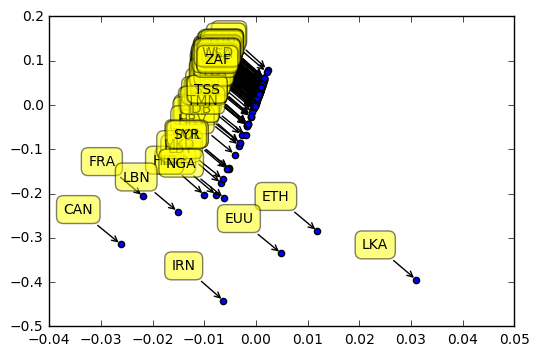

In [186]:
plt.scatter(after_mds[:,0], after_mds[:,1], marker = 'o')
for label, x, y in zip(codes, after_mds[:, 0], after_mds[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.figure(figsize=(2000,100))
plt.show()

In [13]:
code_dict = dict() # dictionary that maps country names to country codes 

In [14]:
f = open('C:\Spring17\Viz\project\country_code.txt', 'r')
for line in f.readlines():
    line = line.strip().split('\t')
    code_dict[line[1]] = line[0]

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas.tools.plotting import parallel_coordinates
import csv

In [267]:
def getCluster(cluster_count, data_frame):  # returns the optimal cluster number using elbowing
    meandist = []
    clusters = range(1, cluster_count)
    for k in range(1, cluster_count):
        model = KMeans(n_clusters=k)
        model.fit(data_frame)
        meandist.append(sum(np.min(cdist(data_frame, model.cluster_centers_, 'euclidean'), axis=1))/6)
    plt.plot(clusters, meandist)
    plt.title('Elbow method for k value')
    plt.show(block = True)

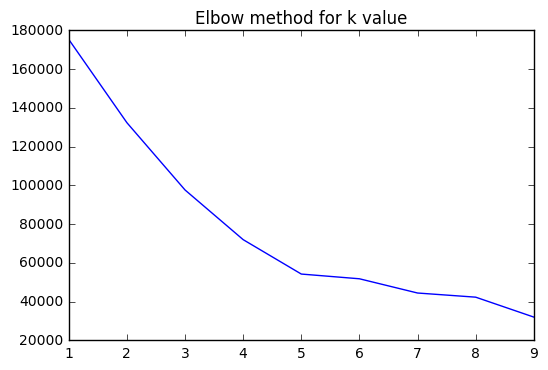

In [329]:
getCluster(10, features)

In [330]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

In [331]:
clus_labels = kmeans.labels_.tolist()

In [332]:
with open('parallel-op.csv', 'wb') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(['country','co2','elec','energy','forest','pop','urban', 'label'])
    for i in range(len(codes)):
        writer.writerow((code_dict[country_codes[i]], features[i][0],features[i][1],features[i][2],features[i][3],features[i][4],features[i][5], clus_labels[i]))

In [307]:
df = pd.read_csv('parallel-op.csv')

In [16]:
len(features)

168

In [17]:
forest_feat = []
co2_feat = []
energy_feat = []
elec_feat= []
pop_feat = []
urban_feat = []
for row in features:
    co2_feat.append(row[0])
    elec_feat.append(row[1])
    energy_feat.append(row[2])
    pop_feat.append(row[4])
    forest_feat.append(row[3])
    urban_feat.append(row[5])

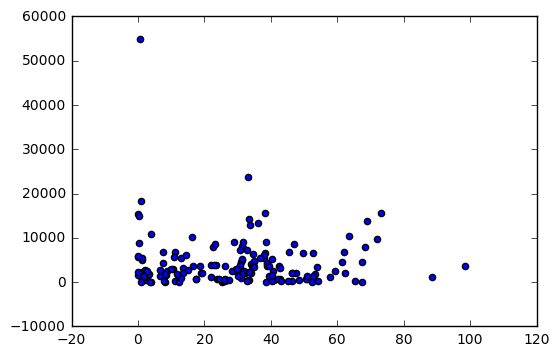

In [358]:
plt.scatter((forest_feat), (co2_feat))
plt.show()

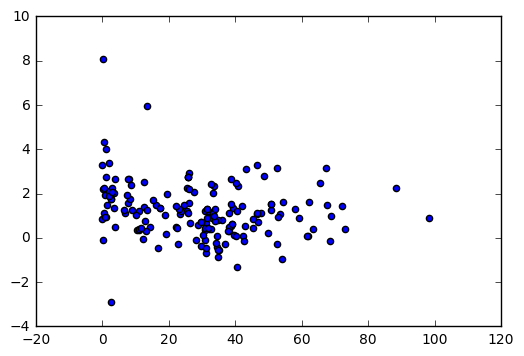

In [357]:
plt.scatter((forest_feat), (pop_feat))
plt.show()

In [359]:
with open('co2forest.csv', 'wb') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(['country','forest','co2'])
    for i in range(len(codes)):
        writer.writerow((code_dict[country_codes[i]], forest_feat[i],co2_feat[i]))

In [360]:
!pip install mpld3

  Running setup.py bdist_wheel for mpld3: started
  Running setup.py bdist_wheel for mpld3: finished with status 'done'
  Stored in directory: C:\Users\tejam\AppData\Local\pip\Cache\wheels\69\bc\68\7ca3b696749d183e998968fc24b0ff3c5e119d9e68bf495b07
Successfully built mpld3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import unicodedata
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
names = []
for i in range(len(codes)):
    try:
        names.append(code_dict[country_codes[i]].encode('utf-8').strip())
    except UnicodeDecodeError: 
        names.append('South Korea')
        
        pass

# print names

    
    
scatter = ax.scatter(forest_feat,
                     co2_feat,
#                      c=np.random.random(size=N),
#                      s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')
plt.xlabel('% of forest cover', fontsize = 16)
plt.ylabel('CO2 emissions per capita', fontsize = 16)
ax.set_title("Forest area vs CO2 emissions", size=20)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels = names)
mpld3.plugins.connect(fig, tooltip)
mpld3.save_html(fig, 'forestco2.html')
mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [12/May/2017 14:05:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2017 14:05:24] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2017 14:05:25] "GET /mpld3.js HTTP/1.1" 200 -
